<a href="https://colab.research.google.com/github/Ziadnasser1/Machine-Learning-Training/blob/master/GradientDescentExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the nesessary libraries.

In [237]:
import numpy as np
import matplotlib.pyplot as plt

Generate random data for `X1`, `X2`, `X3`and define true weights for `W` and generate the dependent variable `Y`.

In [238]:
np.random.seed(42)
X1 = np.random.rand(1000)
X2 = np.random.rand(1000)
X3 = np.random.rand(1000)
W = np.array([3, 2, 1.5, 6])
Y = 5*X1 + 3*X2 + 1.5*X3 + 6

Function used to split the data into `Training` and `Testing`.

In [239]:
def train_test_split(data, labels, testRatio=0.3):
    total_size = len(data)
    test_size = int(total_size * testRatio)
    train_size = total_size - test_size

    indices = np.random.permutation(total_size)
    train_data = data[indices[:train_size]]
    test_data = data[indices[train_size:]]
    train_labels = labels[indices[:train_size]]
    test_labels = labels[indices[train_size:]]

    return train_data, test_data, train_labels, test_labels

Stack the features vertically and add a `bias` term.

In [240]:
X = np.vstack((np.ones(1000),X1, X2, X3)).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Function to perform `Gradient Descent`.

In [241]:
def gradientDescent(X_b, YTrain, weights, LR = 0.00001, iterations=10000):
    cost_history = []
    theta_history = []
    for _ in range(iterations):
        y_predict = np.dot(X_b, weights)
        error = y_predict - YTrain
        gradient = np.dot(X_b.T, error)
        # gradient = np.dot(X_b.T, error) / len(YTrain) with LR = 0.1, iterations 100 is better
        weights -= LR * gradient
        cost = np.mean(error**2)
        cost_history.append(cost)
        theta_history.append(weights.copy())
    return weights, cost_history, theta_history

Run the `Gradient Descent` on the training data to get the `final weights`.

In [242]:
final_weights, cost_history, theta_history= gradientDescent(X_train, Y_train, W)
print(final_weights)

[5.94895138 5.02419576 3.02680875 1.5461417 ]


Function to calculate the `Cost/Loss`.

In [243]:
def costFn(weights, X, Y):
    m = len(Y)
    Y_predict = np.dot(X, weights)
    error = Y_predict - Y
    cost = np.sum(error**2) / (2 * m)
    return cost

Print the calculated loss on the whole data.

In [244]:
loss = costFn(final_weights, X, Y)
print(loss)

0.00015422633418272182


Add `Bias` term to the test features and predict `Y` on the test set.

In [245]:
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test[:, 1:]]
Y_test_predict = np.dot(X_test_b, final_weights)

Calculate the accuracy of the model.

In [246]:
accuracy = 1 - np.mean((Y_test - Y_test_predict)**2) / np.var(Y_test)
print("Accuracy: ", accuracy * 100)

Accuracy:  99.99027976957035


Give the model a new data to see if the predicted values are equal to the real values of the equation.

In [247]:
new_data = np.array([1, 2, 3])
new_data_b = np.insert(new_data, 0, 1)

right_answer = 5 * new_data[0] + 3 * new_data[1] + 1.5 * new_data[2] + 6
print("Right answer:", right_answer)

prediction = np.dot(new_data_b, final_weights)
print("Predicted Output:", prediction)


Right answer: 21.5
Predicted Output: 21.665189747312915


Plot the `Cost` at each iterarion and the `Theta` also.

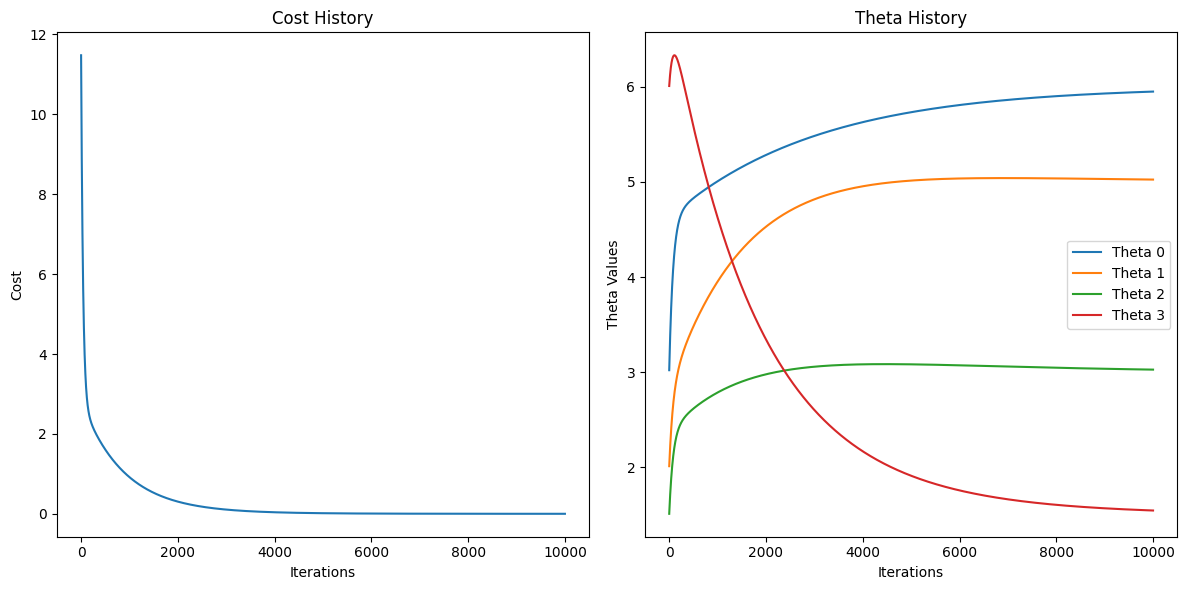

In [248]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.subplot(1, 2, 2)
theta_history = np.array(theta_history)
for i in range(theta_history.shape[1]):
    plt.plot(theta_history[:, i], label=f'Theta {i}')

plt.title('Theta History')
plt.xlabel('Iterations')
plt.ylabel('Theta Values')
plt.legend()

plt.tight_layout()
plt.show()